In [ ]:
!pip3 install opencv-python

In [1]:
import numpy as np
import os
print(os.getcwd())

C:\Users\Song\python\python-data\data23


In [2]:
data_dir = os.chdir(os.getcwd() + "/../../img-animal")

## 이미지 파일 리스트 4000개 읽어봐서, 각각의 이미지 파일마다 타겟 설정

In [3]:
from glob import glob

In [4]:
data_list = glob('*.jpg')
data_list[:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [5]:
len(data_list), type(data_list)

(4000, list)

In [6]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

## sring을 특정한 기준에 의해 token으로 끊어 리스트를 리턴

In [7]:
token = text_to_word_sequence(data_list[0])
token

['cat', '0', 'jpg']

In [8]:
label = []

In [9]:
for i in data_list[:100] :
    token = text_to_word_sequence(i)
    label.append(token[0])
print(len(label))
print(label[:5])

100
['cat', 'cat', 'cat', 'cat', 'cat']


In [10]:
label2 = []

In [11]:
for i in data_list :
    token = text_to_word_sequence(i)
    label2.append(token[0])
print(len(label2))
print(label2[:5])

4000
['cat', 'cat', 'cat', 'cat', 'cat']


## 라벨인코더
### >>> 카테고리형 문자를 숫자로 자동 변환 해주는 역할

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
import cv2
import matplotlib.pyplot as plt

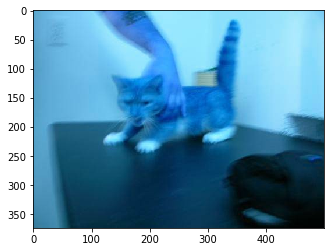

In [15]:
img = cv2.imread(data_list[0])
plt.imshow(img)

In [16]:
img.shape

(374, 500, 3)

## 표준화

In [17]:
image1 = img/255
image1[0][0]

array([0.34117647, 0.64313725, 0.79607843])

## 크기를 동일하게 변경하여 맞춰주기

In [18]:
data_height = 150
data_width = 150
channel_n = 3

In [19]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

## 4000개의 크기를 다 변경하기

In [20]:
img_list = []
# 255로 표준화시켜주고, 크기 변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list :
    scaled_one = cv2.imread(x) / 255
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경전 : ', scaled_one.shape)
#     print('변경후 : ', resized_one.shape)   
    img_list.append(resized_one)
len(img_list), img_list[0].shape

(4000, (150, 150, 3))

In [21]:
img_list[0]

array([[[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [4.84313725e-01, 8.07843137e-01, 9.67973856e-01],
        [4.70588235e-01, 7.96078431e-01, 9.58823529e-01],
        [4.78091503e-01, 7.87895425e-01, 9.40836601e-01]],

       [[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [4.88627451e-01, 8.12052288e-01, 9.62562092e-01],
        [4.75450980e-01, 8.01490196e-01, 9.60784314e-01],
        [4.80026144e-01, 7.89830065e-01, 9.42771242e-01]],

       [[3.41830065e-01, 6.43790850e-01, 7.96732026e-01],
        [3.60784314e-01, 6.62745098e-01, 8.15686275e-01],
        [3.65359477e-01, 6.67320261e-01, 8.20261438e-01],
        ...,
        [5.00261438e-01, 8.17908497e-01, 9.64531590e-01],
        [4.89150327e-01, 8.06

### CNN특성 추출을 하려면 이미지가 4차원이 되어야 한다. <br>(4000, 150, 150, 3) 
* 4000 : 이미지 개수 
* 150, 150 : 가로세로 필셀 
* 3 : 칼라

### 0으로 해춰지는 4차원 배열을 하나 만들어두었다가 <br> 이미지 하나하나를 스케일링하고 리사이징해서 <br> 4차원에 하나식 넣기

In [22]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

### 읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서 <br> 우리가 원하는 이미지 데이터를 만들기

In [23]:
def make_file(data_height, data_width, channel_n, data_list_n) :
    # 라벨링한 결과 넣어줄 리스트 필요
    label = []
    # 4차원으로 만들어줄 4차원 리스트 필요
    images = np.zeros((data_list_n, data_height, data_width, channel_n))
    
    # 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징 하기!
    for i, image in enumerate(data_list) :
        
        # 라벨링 : dog.01.jpg
        tokens = text_to_word_sequence(image)
        label.append(tokens[0])
        
        # 읽어서, 스케일링, 리사이징해서
        image2 = cv2.imread(image)
        image3 = cv2.resize(image2, (data_height, data_width)) / 255
        
        # 4차원 리스트에 하나씩 끼우기
        images[i, :, :, : ] = image3
    label = np.array(label)
    return label, images

In [24]:
labels, images = make_file(data_height, data_width, channel_n, 4000)

In [25]:
labels.shape

(4000,)

In [26]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 4000)

In [27]:
encoder.classes_

array(['cat', 'dog'], dtype='<U3')

In [28]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


## 딥러닝 모델 만들기!!!

In [29]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
model = Sequential()

# 특성추출 레이어를 쌓아준다
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))

# 딥러닝 학습 레이어를 쌓아준다.
# 입력 -- 히든 -- 출력 순서대로 쌓아준다.

# 입력(1개) -- 1차원이여야함
model.add(Flatten()) # 이미지 데이터를 1차원으로 만들어주는 객체

# 히든
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.5))

# 출력(1개) -- 딥러닝하는 학습의 종류에 따라 다르게 써우어야 한다.!!
# 2진 분류인 경우(1, sigmoid)
# 다중 분류인 경우(n, softmax)
# 회귀인 경우(1, linear)
model.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

## 모델의 설정값 지정
### 1. 기울기 찾는데 최적의 방법 설정(옵티마이저)
### 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법(loss)
* 회귀인 경우 : mae
* 분류인 경우 : 이진(binary_crossentropy),
              다중(sparse_categorical_crossentropy)

### 3. fit시킬 때 fit 시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)

In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

## 공부 시키기

In [39]:
# epoch마다 train 의 loss, acc뿐만 아니라,
# test의 loss, acc을 알고 싶으면
# fit(validation_data = (X_test, y_test))\
#조기종료(earlyStoppin)
# rpoch를 실행할 때 최적의 acc인경우ㅡ 더이상 epoch를 수행하지 않아도 되게
# 모델저장(checkPoint)
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1) 객체를 만들어주고, 2) fit(cakkbacks = [객체])
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_animalCNN_model.h5')

cnn_history = model.fit( X_train, 
                         y_train,                
                         batch_size=128,
                         epochs=10,
                         validation_data = (X_test, y_test),
                         callbacks = [es, cp],
                         verbose=2
                        )

Epoch 1/10
25/25 - 23s - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.6931 - val_accuracy: 0.5038 - 23s/epoch - 907ms/step
Epoch 2/10
25/25 - 23s - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038 - 23s/epoch - 914ms/step
Epoch 3/10
25/25 - 23s - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5038 - 23s/epoch - 909ms/step
Epoch 4/10
25/25 - 23s - loss: 0.6930 - accuracy: 0.5075 - val_loss: 0.6930 - val_accuracy: 0.5350 - 23s/epoch - 908ms/step
Epoch 5/10
25/25 - 23s - loss: 0.6910 - accuracy: 0.5288 - val_loss: 0.6868 - val_accuracy: 0.5888 - 23s/epoch - 918ms/step
Epoch 6/10
25/25 - 23s - loss: 0.6866 - accuracy: 0.5609 - val_loss: 0.6797 - val_accuracy: 0.6525 - 23s/epoch - 912ms/step
Epoch 7/10
25/25 - 23s - loss: 0.6774 - accuracy: 0.5691 - val_loss: 0.6638 - val_accuracy: 0.6212 - 23s/epoch - 927ms/step
Epoch 8/10
25/25 - 23s - loss: 0.6691 - accuracy: 0.5881 - val_loss: 0.6452 - val_accuracy: 0.7025 - 23s/epoch - 923ms/step
Epoch 9/

In [40]:
test_result = model.evaluate(X_test,y_test) 
test_result

25/25 [==============================] - 1s 56ms/step - loss: 0.6033 - accuracy: 0.6862


[0.6033312082290649, 0.6862499713897705]

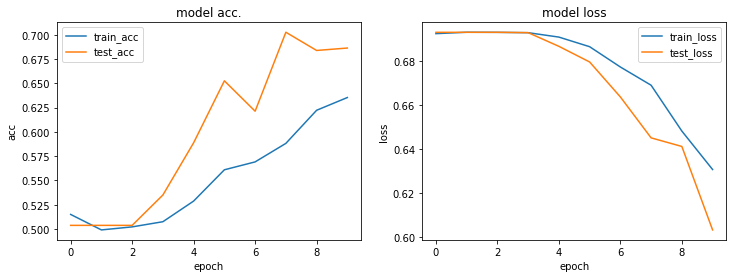

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])

In [42]:
cnn_history2 = model.fit( X_train, 
                         y_train,                
                         batch_size=128,
                         epochs=10,
                         validation_data = (X_test, y_test),
                         callbacks = [es, cp],
                         verbose=2
                        )

Epoch 1/10
25/25 - 24s - loss: 0.6104 - accuracy: 0.6644 - val_loss: 0.6069 - val_accuracy: 0.6725 - 24s/epoch - 963ms/step
Epoch 2/10
25/25 - 24s - loss: 0.5784 - accuracy: 0.7034 - val_loss: 0.5862 - val_accuracy: 0.7038 - 24s/epoch - 948ms/step
Epoch 3/10
25/25 - 23s - loss: 0.5516 - accuracy: 0.7206 - val_loss: 0.5809 - val_accuracy: 0.7113 - 23s/epoch - 933ms/step
Epoch 4/10
25/25 - 24s - loss: 0.5002 - accuracy: 0.7534 - val_loss: 0.5933 - val_accuracy: 0.6900 - 24s/epoch - 975ms/step
Epoch 5/10
25/25 - 25s - loss: 0.4569 - accuracy: 0.7859 - val_loss: 0.6306 - val_accuracy: 0.7075 - 25s/epoch - 993ms/step
Epoch 6/10
25/25 - 24s - loss: 0.4213 - accuracy: 0.8081 - val_loss: 0.7187 - val_accuracy: 0.6925 - 24s/epoch - 975ms/step
Epoch 7/10
25/25 - 24s - loss: 0.4192 - accuracy: 0.8150 - val_loss: 0.7005 - val_accuracy: 0.6988 - 24s/epoch - 964ms/step
Epoch 8/10
25/25 - 23s - loss: 0.3877 - accuracy: 0.8322 - val_loss: 0.6825 - val_accuracy: 0.6775 - 23s/epoch - 938ms/step


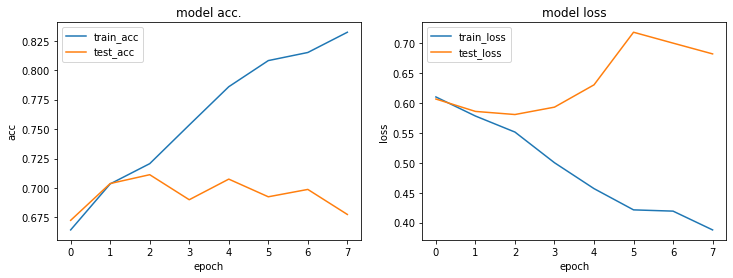

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history2.history['accuracy'])
plt.plot(cnn_history2.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history2.history['loss'])
plt.plot(cnn_history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])